In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Loading Data

In [280]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

##### Checking if data is biased

<AxesSubplot:xlabel='label', ylabel='count'>

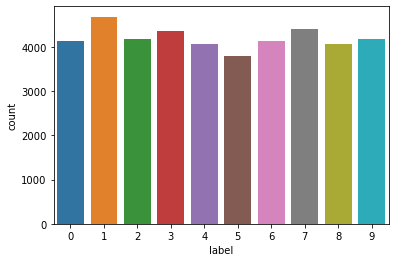

In [281]:
sns.countplot(x=train.label)

In [282]:
train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

#### Checking for missing data

In [297]:
train.isnull().any().sum()

0

In [298]:
test.isnull().any().sum()

0

In [321]:
X_traint = train.drop(['label'],axis=1)
y_traint = train.label

In [323]:
X_traint = X_traint.values.reshape(-1, 28, 28, 1)

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X_traint, y_traint, test_size = 0.1, random_state=7)

In [326]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800,)
(4200,)


#### Normalizing Data

Essential for any deep learning model

In [327]:
X_train = X_train/255
y_train = y_train/255

In [328]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800,)
(4200,)


### Defining CNN Model

In [351]:
cnn = keras.models.Sequential()

In [352]:
cnn.add(Conv2D(filters=64, kernel_size=7, activation='relu', padding='same', input_shape=(28, 28, 1)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Dropout(0.2))

In [353]:
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Dropout(0.2))

In [354]:
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10, activation='softmax'))

In [355]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [356]:
print(cnn.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 28, 28, 64)        3200      
                                                                 
 batch_normalization_63 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_125 (Conv2D)         (None, 28, 28, 64)        102464    
                                                                 
 batch_normalization_64 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                     

In [357]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1182/1182 [==============================] - 213s 180ms/step - loss: 0.0025 - accuracy: 0.0978
Epoch 2/10
1182/1182 [==============================] - 213s 180ms/step - loss: 9.4611e-12 - accuracy: 0.0980
Epoch 3/10
1182/1182 [==============================] - 212s 180ms/step - loss: 6.3074e-12 - accuracy: 0.0980
Epoch 4/10
1182/1182 [==============================] - 219s 185ms/step - loss: 1.2615e-11 - accuracy: 0.0980
Epoch 5/10
 339/1182 [=======>......................] - ETA: 2:43 - loss: 1.0989e-11 - accuracy: 0.0985

KeyboardInterrupt: 